<font face="Vazir" size=5><div dir=rtl>
# بخش اول: کتابخانه‌های مورد نیاز

In [166]:
import numpy as np
import pandas as pd 
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import math   

In [167]:
import warnings
warnings.filterwarnings('ignore')

<font face="Vazir" size=5><div dir=rtl>
# بخش دوم: لود کردن دیتاست و پاکسازی داده‌ها
<br>
در این بخش هدف ما رسیدن به شناخت سطحی و ابتدایی از دیتاست است. برای اینکار دیتاست را لود کرده و چند سطر ابتدایی آن را نمایش می‌دهیم.

<font face="Vazir" size=5><div dir=rtl>
این دیتاست حاوی اطلاعات جمعیتی کشورهاست<br>
توضیح هر ستون دیتاست:<br>
<ul style="font-size: 20px" dir=rtl>
<li>Country (or dependency): نام کشور</li>
<li>Population (2020): جمعیت</li>
<li>Yearly Change: تغییرات سالانه جمعیت</li>
<li>Net Change: تغییرات خالص جمعیت</li>
<li>Land Area (Km²): مساحت</li>
<li>Migrants (net): میزان مهاجرت</li>
<li>Fert. Rate: نرخ باروری</li>
<li>Med. Age: میانگین سنی</li>
<li>Urban Pop %: درصد جمعیت شهری</li>
<li>World Share: سهم کشور از جمعیت جهان</li>


In [227]:
data = pd.read_csv('data.csv')
data.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,770880,-233379.0,3.6,23,35 %,2.83 %


<font face="Vazir" size=5><div dir=rtl>
در این قسمت برای راحتی کار با ستون‌های نام آن‌ها را کمی تغییر می‌دهیم تا قابل استفاده‌تر شوند.<br>
<ul style="font-size: 20px" dir=ltr>
<li>Country (or dependency): country</li>
<li>Population (2020): population</li>
<li>Yearly Change: yearly_change</li>
<li>Net Change: net_change</li>
<li>Land Area (Km²): land_area</li>
<li>Migrants (net): migrants</li>
<li>Fert. Rate: fert_rate</li>
<li>Med. Age: med_age</li>
<li>Urban Pop %: urban_pop</li>
<li>World Share: world_share</li>


In [228]:
columns_name = list(data.columns)
columns = []
for i in range(len(columns_name)):
  name = columns_name[i].split(' (')[0]
  name = name.replace('.', '')
  name = name.replace(' %', '')
  name = name.replace(' ', '_')
  name = name.lower()
  columns.append(name)

In [229]:
data.rename(columns=dict(zip(data.columns, columns)), inplace=True)

In [230]:
data.shape[0]

235

In [231]:
data.dtypes

country           object
population         int64
yearly_change     object
net_change         int64
land_area          int64
migrants         float64
fert_rate         object
med_age           object
urban_pop         object
world_share       object
dtype: object

In [232]:
data.isnull().mean()

country          0.000000
population       0.000000
yearly_change    0.000000
net_change       0.000000
land_area        0.000000
migrants         0.144681
fert_rate        0.000000
med_age          0.000000
urban_pop        0.000000
world_share      0.000000
dtype: float64

In [233]:
data.isnull().sum()

country           0
population        0
yearly_change     0
net_change        0
land_area         0
migrants         34
fert_rate         0
med_age           0
urban_pop         0
world_share       0
dtype: int64

In [234]:
cols = data.columns
for i in range(len(data)):
  for c in cols:
    if type(data.loc[i, c]) == str:
      if 'N.A.' in data.loc[i, c]:
        data.loc[i, c] = np.nan

In [235]:
migrants_mean = data['migrants'].mean()
data['migrants'] = data['migrants'].fillna(migrants_mean)

data['fert_rate'] = data['fert_rate'].astype('float')
fert_rate_mean = data['fert_rate'].mean()
data['fert_rate'] = data['fert_rate'].fillna(migrants_mean)

# data['med_age'] = data['med_age'].astype('float')
# med_age_mean = data['med_age'].mean()
# data['med_age'] = data['med_age'].fillna(migrants_mean)

<font face="Vazir" size=5><div dir=ltr>
#Ratio<br>
<font face="Vazir" size=5><div dir=rtl>
در دیتاست ما علاوه بر جمعیت، مساحت را نیز داریم از همین رو می‌خواهیم تراکم جمعیت یا نسبت جمعیت به مساحت را حساب کنیم و در ستون جدیدی قرار دهیم.

In [236]:
# data['people_per_area'] = data['population'] / data['land_area']
data['people_per_area'] = 0
for i in range(len(data)):
  data.loc[i, 'people_per_area'] = math.ceil(data.loc[i, 'population'] / (data.loc[i, 'land_area'] + 1))
data.head()

,country,population,yearly_change,net_change,land_area,migrants,fert_rate,med_age,urban_pop,world_share,people_per_area
0,China,1440297825,0.39 %,5540090,9388211,-348399.0,1.7,38,61 %,18.47 %,154
1,India,1382345085,0.99 %,13586631,2973190,-532687.0,2.2,28,35 %,17.70 %,465
2,United States,331341050,0.59 %,1937734,9147420,954806.0,1.8,38,83 %,4.25 %,37
3,Indonesia,274021604,1.07 %,2898047,1811570,-98955.0,2.3,30,56 %,3.51 %,152
4,Pakistan,221612785,2.00 %,4327022,770880,-233379.0,3.6,23,35 %,2.83 %,288


In [237]:
low_density = data[["country","people_per_area"]].sort_values(by= "people_per_area",ascending=True).head(10)
low_density.head()

,country,people_per_area
208,Greenland,1
231,Falkland Islands,1
169,Western Sahara,3
135,Mongolia,3
181,French Guiana,4


<font face="Vazir" size=5><div dir=rtl>
به وسیله نمودارهای زیر تراکم جمعیت‌های زیاد و کم را نمایش می‌دهیم.

In [238]:
high_density = data[["country","people_per_area"]].sort_values(by="people_per_area",ascending=False).head(10)
high_density.head()

,country,people_per_area
166,Macao,20996
213,Monaco,19645
113,Singapore,8358
103,Hong Kong,7144
218,Gibraltar,3063


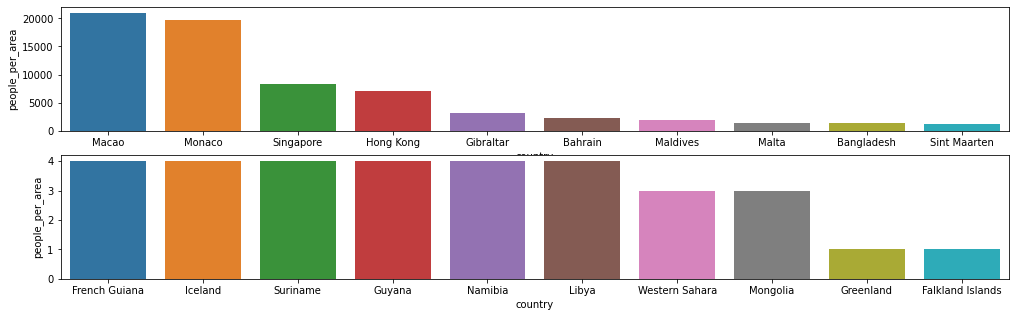

In [239]:
low_density = low_density.sort_values(by='people_per_area', ascending=False)

plt.figure(figsize=(17,5))
plt.subplot(2,1,1)
sns.barplot(x="country",y="people_per_area",data=high_density)

plt.subplot(2,1,2)
sns.barplot(x="country",y="people_per_area",data=low_density)


In [240]:
migration_st=data[["country","migrants"]].sort_values(by= "migrants",ascending=False).head(10)
migration_st.head()

,country,migrants
2,United States,954806.0
18,Germany,543822.0
16,Turkey,283922.0
20,United Kingdom,260650.0
38,Canada,242032.0


In [241]:
migration_st2=data[["country","migrants"]].sort_values(by= "migrants", ascending=True).head(10)
migration_st2.head()

,country,migrants
49,Venezuela,-653249.0
1,India,-532687.0
67,Syria,-427391.0
7,Bangladesh,-369501.0
0,China,-348399.0


<font face="Vazir" size=5><div dir=rtl>
همانطور که در جدول دیدم در ستون مهاجران، برخی کشورها مقدار منفی داشتند که نمایانگر مهاجرناپذیری و مهاجرت افراد بومی به خارج از کشور است که نمودار جالبی دارد و در ادامه می‌بینیم.

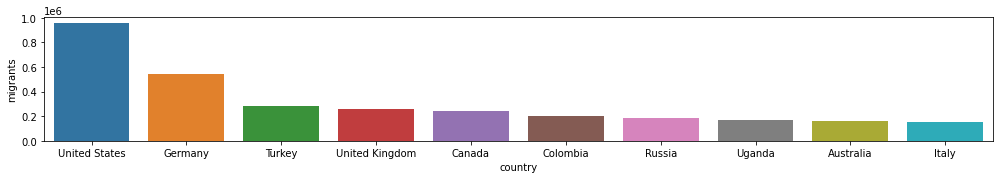

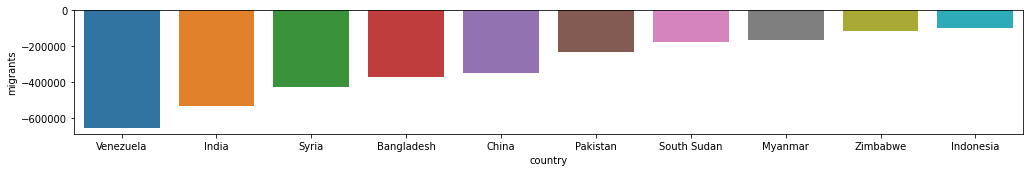

In [242]:
plt.figure(figsize=(17,5))
plt.subplot(2,1,1)
sns.barplot(x="country",y="migrants",data=migration_st)

plt.figure(figsize=(17,5))
plt.subplot(2,1,2)
sns.barplot(x="country",y="migrants",data=migration_st2)

<font face="Vazir" size=5><div dir=ltr>
#Binning <br>
<font face="Vazir" size=5><div dir=rtl>
در دیتاست ما فیچری تحت عنوان میانگین سنی وجود دارد، این فیچر که مینیمم ۱۵ سال و ماکسیمم ۴۸ سال را دارد را می‌توان به سه دسته جوان، میانسال و مسن دسته‌بندی کرد.

In [243]:
print('youngest country med age: ', min(data.loc[:200, 'med_age']))
print('oldest country med age: ', max(data.loc[:200, 'med_age']))

youngest country med age:  15
oldest country med age:  48


In [244]:
data['med_age'] = data['med_age'].astype('float')
med_age_mean = data['med_age'].mean()
data['med_age'] = data['med_age'].fillna(migrants_mean)

In [245]:
# young: x < 25
# mid: 25 < x < 40
# old: 40 < x
bins = [0, 25, 40, 50]
labels = ['young', 'mid', 'old']
data['binned_age'] = pd.cut(data['med_age'], bins=bins, labels=labels)

In [246]:
data.head()

,country,population,yearly_change,net_change,land_area,migrants,fert_rate,med_age,urban_pop,world_share,people_per_area,binned_age
0,China,1440297825,0.39 %,5540090,9388211,-348399.0,1.7,38.0,61 %,18.47 %,154,mid
1,India,1382345085,0.99 %,13586631,2973190,-532687.0,2.2,28.0,35 %,17.70 %,465,mid
2,United States,331341050,0.59 %,1937734,9147420,954806.0,1.8,38.0,83 %,4.25 %,37,mid
3,Indonesia,274021604,1.07 %,2898047,1811570,-98955.0,2.3,30.0,56 %,3.51 %,152,mid
4,Pakistan,221612785,2.00 %,4327022,770880,-233379.0,3.6,23.0,35 %,2.83 %,288,young


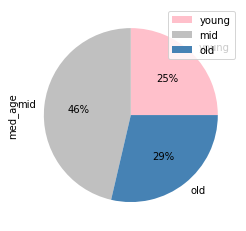

In [247]:
colors = ['pink', 'silver', 'steelblue']

data.groupby(['binned_age']).sum().plot(kind='pie', y='med_age', 
                                        autopct='%1.0f%%', colors=colors)

<font face="Vazir" size=10><div dir=ltr>
## Combining
<font face="Vazir" size=5><div dir=rtl>
ابتدا با حذف علامت درصد و اصلاح مقادیر فیچر <span dir=ltr>urban_pop</span> دیتا را قابل استفاده‌تر می‌کنیم.

In [248]:
data['urban_pop'] = data['urban_pop'].fillna('-1')

In [249]:
def convert_percentage(text):
  text = text.split(' %')[0]
  text = int(text) * 0.01
  text = "{:.2f}".format(text)
  return text
data['urban_pop'] = data['urban_pop'].apply(convert_percentage)
data["urban_pop"] = data["urban_pop"].astype('float')

In [250]:
for i in range(len(data)):
  if data.loc[i, 'urban_pop'] == -0.01:
    data.loc[i, 'urban_pop'] = np.nan

In [251]:
urban_pop_mean = data["urban_pop"].mean()
data["urban_pop"].fillna(urban_pop_mean, inplace=True)

In [252]:
data.head()

,country,population,yearly_change,net_change,land_area,migrants,fert_rate,med_age,urban_pop,world_share,people_per_area,binned_age
0,China,1440297825,0.39 %,5540090,9388211,-348399.0,1.7,38.0,0.61,18.47 %,154,mid
1,India,1382345085,0.99 %,13586631,2973190,-532687.0,2.2,28.0,0.35,17.70 %,465,mid
2,United States,331341050,0.59 %,1937734,9147420,954806.0,1.8,38.0,0.83,4.25 %,37,mid
3,Indonesia,274021604,1.07 %,2898047,1811570,-98955.0,2.3,30.0,0.56,3.51 %,152,mid
4,Pakistan,221612785,2.00 %,4327022,770880,-233379.0,3.6,23.0,0.35,2.83 %,288,young


<font face="Vazir" size=5><div dir=rtl>
سپس با افزودن ستون urban_pop_count و با استفاده از ترکیب دو ستون درصد جمعیت شهری و جمعیت کل، جمعیت شهری هر کشور را محاسبه می‌کنیم.

In [253]:
data['urban_pop_count'] = 0

In [254]:
for i in range(len(data)):
  data.loc[i, 'urban_pop_count'] = int(data.loc[i, 'urban_pop'] * data.loc[i, 'population'])

In [255]:
data.head()

,country,population,yearly_change,net_change,land_area,migrants,fert_rate,med_age,urban_pop,world_share,people_per_area,binned_age,urban_pop_count
0,China,1440297825,0.39 %,5540090,9388211,-348399.0,1.7,38.0,0.61,18.47 %,154,mid,878581673
1,India,1382345085,0.99 %,13586631,2973190,-532687.0,2.2,28.0,0.35,17.70 %,465,mid,483820779
2,United States,331341050,0.59 %,1937734,9147420,954806.0,1.8,38.0,0.83,4.25 %,37,mid,275013071
3,Indonesia,274021604,1.07 %,2898047,1811570,-98955.0,2.3,30.0,0.56,3.51 %,152,mid,153452098
4,Pakistan,221612785,2.00 %,4327022,770880,-233379.0,3.6,23.0,0.35,2.83 %,288,young,77564474


<font face="Vazir" size=10><div dir=ltr>
## Principal Component Analysis
<font face="Vazir" size=5><div dir=rtl>
این روش برای دیتاهایی با ابعاد بزرگ است ولی دیتای ما ابعاد کوچکی دارد و خیلی نیازی به چنین کاری ندارد. ولی صرفا برای آزمایش این روش از آن استفاده می‌کنیم.

In [256]:
to_pca_data = data.iloc[:200, 1:-2].copy()
to_pca_data.head()

,population,yearly_change,net_change,land_area,migrants,fert_rate,med_age,urban_pop,world_share,people_per_area
0,1440297825,0.39 %,5540090,9388211,-348399.0,1.7,38.0,0.61,18.47 %,154
1,1382345085,0.99 %,13586631,2973190,-532687.0,2.2,28.0,0.35,17.70 %,465
2,331341050,0.59 %,1937734,9147420,954806.0,1.8,38.0,0.83,4.25 %,37
3,274021604,1.07 %,2898047,1811570,-98955.0,2.3,30.0,0.56,3.51 %,152
4,221612785,2.00 %,4327022,770880,-233379.0,3.6,23.0,0.35,2.83 %,288


In [257]:
def convert_percentage(text):
  if type(text) != float:
    text = text.split(' %')[0]
  return float(text)
to_pca_data['yearly_change'] = to_pca_data['yearly_change'].apply(convert_percentage)
to_pca_data['world_share'] = to_pca_data['world_share'].apply(convert_percentage)

In [258]:
to_pca_data.head()

,population,yearly_change,net_change,land_area,migrants,fert_rate,med_age,urban_pop,world_share,people_per_area
0,1440297825,0.39,5540090,9388211,-348399.0,1.7,38.0,0.61,18.47,154
1,1382345085,0.99,13586631,2973190,-532687.0,2.2,28.0,0.35,17.70,465
2,331341050,0.59,1937734,9147420,954806.0,1.8,38.0,0.83,4.25,37
3,274021604,1.07,2898047,1811570,-98955.0,2.3,30.0,0.56,3.51,152
4,221612785,2.00,4327022,770880,-233379.0,3.6,23.0,0.35,2.83,288


<font face="Vazir" size=5><div dir=rtl>
برای استفاده از دیتا در روش PCA ابتدا باید دیتا را نرمالیزه کنیم و سپس باقی گام‌ها را پیش ببریم.

In [259]:
from sklearn.preprocessing import StandardScaler
normalized_df = StandardScaler().fit_transform(to_pca_data)

In [260]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(normalized_df)
df_pca = pd.DataFrame(data = normalized_df)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,9.625569,-0.744482,4.241561,4.831794,-2.825858,-0.788656,0.812073,0.066162,9.633592,-0.121372
1,9.227479,-0.194643,10.890066,1.285293,-4.320587,-0.392943,-0.283842,-1.122813,9.220803,0.064866
2,2.007906,-0.561203,1.265092,4.698675,7.744221,-0.709514,0.812073,1.072218,2.010391,-0.191436
3,1.614166,-0.121331,2.058556,0.643099,-0.802659,-0.313800,-0.064659,-0.162487,1.613685,-0.122570
4,1.254159,0.730920,3.239256,0.067760,-1.892949,0.715054,-0.831799,-1.122813,1.249144,-0.041128


<font face="Vazir" size=5><div dir=rtl>
حالا می‌توانیم متوجه شویم که هر فیچر چه اطلاعاتی به ما می‌دهد و سپس فیچرهای مناسب را انتخاب کنیم.

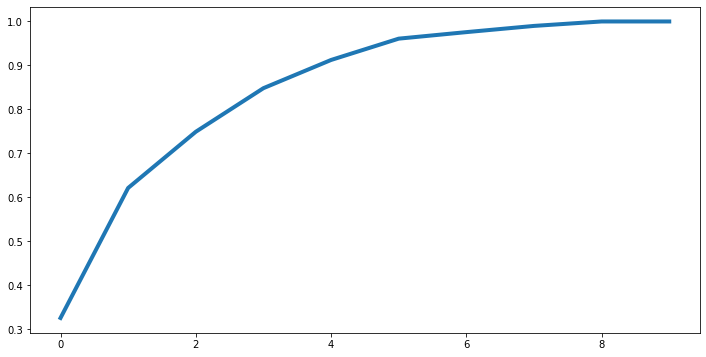

In [261]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_),lw=4)


<font face="Vazir" size=10><div dir=ltr>
## Mutual Information
<font face="Vazir" size=5><div dir=rtl>

از این روش برای پیدا کردن ارتباط بین فیچرها و تاثیر آن‌ها بر هدف ما که نرخ باروری است، استفاده می‌کنیم.

In [262]:
num_to_str = dict(zip(df_pca.columns, to_pca_data.columns))
num_to_str

{0: 'population',
 1: 'yearly_change',
 2: 'net_change',
 3: 'land_area',
 4: 'migrants',
 5: 'fert_rate',
 6: 'med_age',
 7: 'urban_pop',
 8: 'world_share',
 9: 'people_per_area'}

In [263]:
target_column = to_pca_data.pop("fert_rate")

In [264]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
feature_selector = SelectKBest(score_func=mutual_info_regression, k = 'all').fit(df_pca,target_column)

<font face="Vazir" size=5><div dir=rtl>
رابطه بین نرخ باروری و عوامل: جمعیت، میانگین سنی و مهاجرپذیری

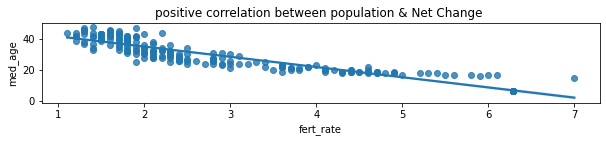

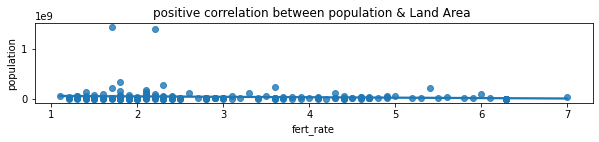

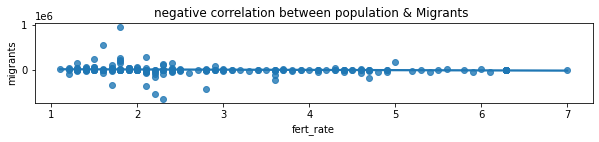

In [265]:
plt.figure(figsize=(10,5))
plt.subplot(3,1,1)
plt.title("positive correlation between population & Net Change ")
sns.regplot(x="fert_rate", y= "med_age",data=data)

plt.figure(figsize=(10,5))
plt.subplot(3,1,1)
plt.title("positive correlation between population & Land Area ")
sns.regplot(x="fert_rate", y= "population", data=data)

plt.figure(figsize=(10,5))
plt.subplot(3,1,1)
plt.title("negative correlation between population & Migrants ")
sns.regplot(x="fert_rate", y= "migrants", data=data)

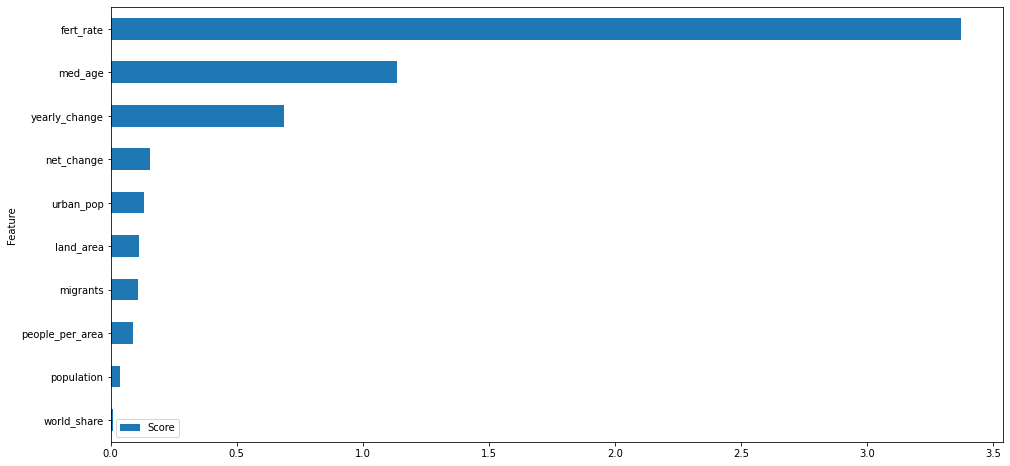

In [266]:
feature_scores = pd.DataFrame({'Feature':num_to_str.values(),'Score':feature_selector.scores_})
feature_scores.sort_values(by=['Score'],inplace=True)

feature_scores[0:20].plot(x='Feature',y='Score',kind='barh',figsize=(16,8))

<font face="Vazir" size=10><div dir=ltr>
## Counts and Aggregation
<font face="Vazir" size=5><div dir=rtl>

در اینجا ما یک دیتاست دیگر که مشخص‌کننده قاره هرکشور است اضافه می‌کنیم و بر اساس آن ستون continent را به دیتا می‌افزاییم.
سپس نمودار جمعیت هر قاره را به صورت pie chart رسم می‌کنیم.
<br>
نکته قابل توجه این است که برخی کشورها نام‌های متفاوتی در دو دیتاست دارند و به همین علت با یکدیگر مپ نمی‌شوند؛ لذا برخی از آن‌ها را به صورت دستی اصلاح می‌کنیم و نام قاره‌شان را می‌افزاییم و برای برخی دیگر کاری نمی‌کنیم (می‌تونیم بکنیم ولی.)

In [267]:
countries_by_continents = pd.read_csv('Countries by continents.csv')
countries_by_continents.head()

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [268]:
data.head()

,country,population,yearly_change,net_change,land_area,migrants,fert_rate,med_age,urban_pop,world_share,people_per_area,binned_age,urban_pop_count
0,China,1440297825,0.39 %,5540090,9388211,-348399.0,1.7,38.0,0.61,18.47 %,154,mid,878581673
1,India,1382345085,0.99 %,13586631,2973190,-532687.0,2.2,28.0,0.35,17.70 %,465,mid,483820779
2,United States,331341050,0.59 %,1937734,9147420,954806.0,1.8,38.0,0.83,4.25 %,37,mid,275013071
3,Indonesia,274021604,1.07 %,2898047,1811570,-98955.0,2.3,30.0,0.56,3.51 %,152,mid,153452098
4,Pakistan,221612785,2.00 %,4327022,770880,-233379.0,3.6,23.0,0.35,2.83 %,288,young,77564474


In [269]:
continents_dict = {}
continents_dict = dict(zip(countries_by_continents['Country'], countries_by_continents['Continent']))

In [278]:
list(set(continents_dict.values()))

['South America', 'Oceania', 'Asia', 'Europe', 'Africa', 'North America']

In [270]:
data.insert(1, 'continent', '')

In [276]:
for i in range(len(data)):
  if data.loc[i, 'country'] in continents_dict.keys():
    data.loc[i, 'continent'] = continents_dict[data.loc[i, 'country']]
  else:
    print(i, data.loc[i, 'country'])

15 DR Congo
25 Myanmar
52 Côte d'Ivoire
58 Burkina Faso
85 Czech Republic (Czechia)
120 State of Palestine
140 Puerto Rico
147 North Macedonia
155 Timor-Leste
158 Eswatini
161 Réunion
166 Macao
169 Western Sahara
171 Cabo Verde
175 Guadeloupe
178 Martinique
181 French Guiana
183 New Caledonia
184 French Polynesia
185 Mayotte
186 Sao Tome & Principe
189 Channel Islands
190 Guam
191 Curaçao
195 St. Vincent & Grenadines
196 Aruba
198 U.S. Virgin Islands
201 Isle of Man
204 Cayman Islands
205 Bermuda
207 Northern Mariana Islands
208 Greenland
209 American Samoa
210 Saint Kitts & Nevis
211 Faeroe Islands
212 Sint Maarten
214 Turks and Caicos
215 Saint Martin
218 Gibraltar
219 British Virgin Islands
220 Caribbean Netherlands
222 Cook Islands
223 Anguilla
225 Wallis & Futuna
227 Saint Barthelemy
228 Saint Helena
229 Saint Pierre & Miquelon
230 Montserrat
231 Falkland Islands
232 Niue
233 Tokelau
234 Holy See


In [279]:
data.loc[15, 'continent'] = 'Africa'
data.loc[58, 'continent'] = 'Africa'
data.loc[85, 'continent'] = 'Europe'
data.loc[201, 'continent'] = 'Europe'
data.loc[198, 'continent'] = 'North America'
data.loc[208, 'continent'] = 'North America'
data.loc[181, 'continent'] = 'South America'
data.loc[120, 'continent'] = 'Asia'

In [211]:
x = data['population'].aggregate(["sum"])
print('whole world population: ', x)

whole world population:  sum    7808449406
Name: population, dtype: int64


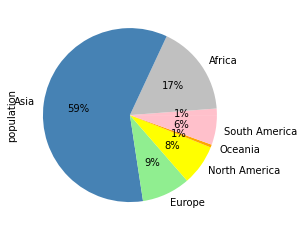

In [284]:
colors = ['pink', 'silver', 'steelblue', 'lightgreen', 'yellow', 'orange']

data.groupby(['continent']).sum()['population'].plot(kind='pie', y='med_age', 
                                        autopct='%1.0f%%', colors=colors)